In [36]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [37]:
import numpy as np
import pandas as pd
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [38]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func

In [39]:
# create engine to hawaii.sqlite
engine = create_engine("sqlite:///Resources/hawaii.sqlite")

In [40]:
# reflect an existing database into a new model
Base = automap_base()
# reflect the tables
Base.prepare(autoload_with=engine)
# Save reference to the table
Hawaii_Measurements = Base.classes.measurement

In [41]:
# View all of the classes that automap found
Base.classes.keys()

['measurement', 'station']

In [43]:
#Save refrerences to the classes
Measurement= Base.classes.measurement
Station= Base.classes.station

In [44]:
# Create our session (link) from Python to the DB
session = Session(engine)

# Exploratory Precipitation Analysis

In [83]:
#Format of Measurement data:
measurement = engine.execute('SELECT * FROM Measurement')
print(measurement.keys())
#total_stations = session.query(Station).count

RMKeyView(['id', 'station', 'date', 'prcp', 'tobs'])


In [46]:
# Find the most recent date in the data set.
session.query(func.max(Hawaii_Measurements.date)).all()

[('2017-08-23',)]

In [47]:
#TO DO see 3.2
# Design a query to retrieve the last 12 months of precipitation data and plot the results. 
# Starting from the most recent data point in the database. 
latest_date= (session.query(Hawaii_Measurements.date)
              .order_by(Hawaii_Measurements.date.desc()).first())
print(latest_date)

('2017-08-23',)


In [48]:
# Calculate the date one year from the last date in data set.
yr_ago_date = dt.date(2017,8,23) - dt.timedelta(days=366)
print(yr_ago_date)

2016-08-22


In [49]:
# Perform a query to retrieve the data and precipitation scores
prcp_scores = (session.query(Hawaii_Measurements.date, Hawaii_Measurements.prcp)).filter(Hawaii_Measurements.date >= '2016-08-23').order_by(Hawaii_Measurements.date).all()
prcp_scores

[('2016-08-23', 0.0),
 ('2016-08-23', 3.8),
 ('2016-08-23', 1.3),
 ('2016-08-23', None),
 ('2016-08-23', 0.5),
 ('2016-08-23', 45.5),
 ('2016-08-23', 17.8),
 ('2016-08-24', 2.0),
 ('2016-08-24', 54.6),
 ('2016-08-24', 57.9),
 ('2016-08-24', None),
 ('2016-08-24', 31.0),
 ('2016-08-24', 54.6),
 ('2016-08-24', 36.8),
 ('2016-08-25', 2.0),
 ('2016-08-25', 2.0),
 ('2016-08-25', 0.0),
 ('2016-08-25', 0.0),
 ('2016-08-25', 5.3),
 ('2016-08-25', 1.5),
 ('2016-08-25', 2.8),
 ('2016-08-26', 0.0),
 ('2016-08-26', 0.8),
 ('2016-08-26', 0.5),
 ('2016-08-26', 1.0),
 ('2016-08-26', 0.0),
 ('2016-08-26', 0.3),
 ('2016-08-27', 0.0),
 ('2016-08-27', 4.6),
 ('2016-08-27', 0.5),
 ('2016-08-27', 0.0),
 ('2016-08-27', 3.0),
 ('2016-08-27', None),
 ('2016-08-28', 0.3),
 ('2016-08-28', 3.6),
 ('2016-08-28', 3.6),
 ('2016-08-28', 3.6),
 ('2016-08-28', 15.2),
 ('2016-08-28', 52.6),
 ('2016-08-29', 0.0),
 ('2016-08-29', 4.3),
 ('2016-08-29', 1.0),
 ('2016-08-29', None),
 ('2016-08-29', 0.0),
 ('2016-08-29', 8.9

In [50]:
# Save the query results as a Pandas DataFrame. Explicitly set the column names 
prcp_scores_df = pd.DataFrame(prcp_scores, columns=['date', 'prcp'])
# Sort the dataframe by date
prcp_scores_df.sort_values(by=['date'])
prcp_scores_df.head()


,date,prcp
0,2016-08-23,0.0
1,2016-08-23,3.8
2,2016-08-23,1.3
3,2016-08-23,NaN
4,2016-08-23,0.5


In [30]:
# Use Pandas Plotting with Matplotlib to plot the data SORT

prcp_scores_df(columns=['date,'prcp'])
prcp_scores_df.set_index('date', inplace=True)
prcp_scores_df.plot.bar()
plt.show()

SyntaxError: invalid syntax (4085609756.py, line 2)

Text(0, 0.5, 'mm')

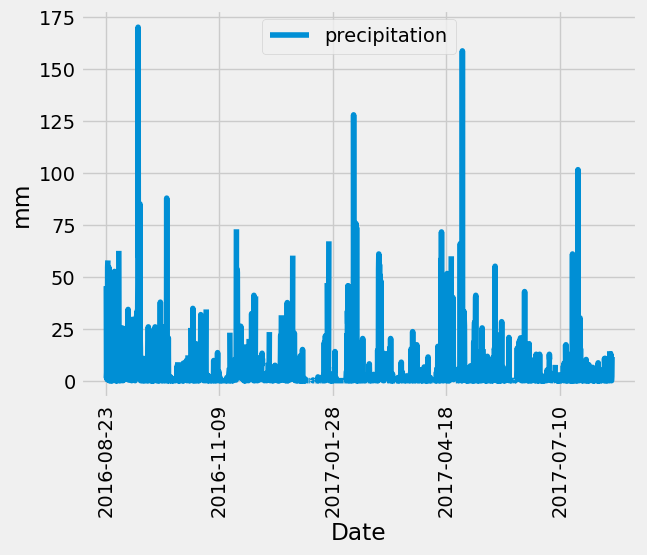

In [10]:
#COVERED ABOVE
# Design a query to retrieve the last 12 months of precipitation data and plot the results. 
# Starting from the most recent data point in the database. 

# Calculate the date one year from the last date in data set.


# Perform a query to retrieve the data and precipitation scores


# Save the query results as a Pandas DataFrame. Explicitly set the column names


# Sort the dataframe by date


# Use Pandas Plotting with Matplotlib to plot the data


In [31]:
prcp_scores_df= describe()

NameError: name 'describe' is not defined

In [11]:
# Use Pandas to calculate the summary statistics for the precipitation data (CHECK)
prcp_scores_df=describe()

,precipitation
count,2021.000000
mean,4.505888
std,11.713487
min,0.000000
25%,0.000000
50%,0.500000
75%,3.300000
max,170.200000


# Exploratory Station Analysis

In [66]:
#Check format of data
stations=engine.execute('SELECT * FROM Station')
print(stations.keys())


RMKeyView(['id', 'station', 'name', 'latitude', 'longitude', 'elevation'])


In [67]:
# Design a query to calculate the total number of stations in the dataset
total_stations = session.query(Station).count()
print(total_stations)


9


In [68]:
# Design a query to find the most active stations (i.e. which stations have the most rows?)
# List the stations and their counts in descending order.
station_activity = session.query(Measurement.station, func.count(Measurement.station)).group_by(Measurement.station).order_by(func.count(Measurement.station).desc()).all()
station_activity

[('USC00519281', 2772),
 ('USC00519397', 2724),
 ('USC00513117', 2709),
 ('USC00519523', 2669),
 ('USC00516128', 2612),
 ('USC00514830', 2202),
 ('USC00511918', 1979),
 ('USC00517948', 1372),
 ('USC00518838', 511)]

In [82]:
# Using the most active station id from the previous query, calculate the lowest, highest, and average temperature.
tobs ={Measurement.station, func.min(Measurement.tobs), func.max(Measurement.tobs), func.avg(Measurement.tobs)}

most_active_station = session.query(*tobs).filter(Measurement.station == 'USC00519281').all()

most_active_station_temp = pd.DataFrame(most_active_station, columns=['min_temp','avg_temp','station','max_temp'])
print(most_active_station_temp)


,min_temp,avg_temp,station,max_temp
0,12.2,22.035823,USC00519281,29.4


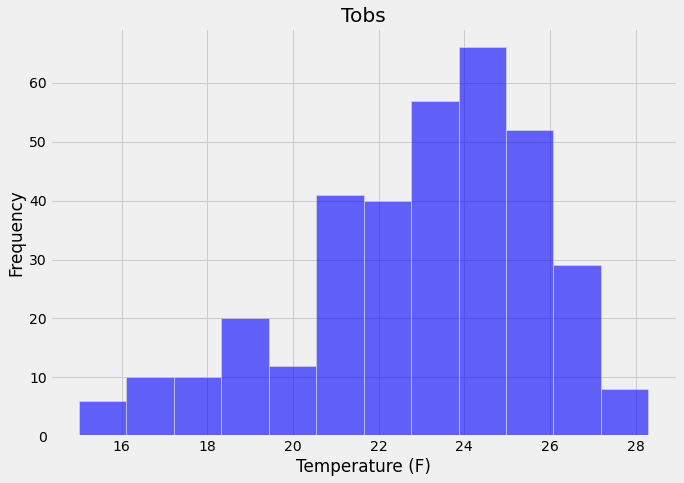

In [88]:
# Using the most active station id
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram CHECK

    filter(Measurement.station == 'USC00519281').all()
year_tobs=(session.query(Measurement.date,(Measurement.tobs)).filter(func.strftime(Measurement.date) > '2016-08-23').filter(Measurement.station=='USC00519281').all())
#print(year_tobs)

tobs_df=pd.DataFrame(year_tobs)
tobs_df.set_index('date',inplace=True)

plt.rcParams['figure.figsize']=(10,7)
plt.hist(tobs_df['tobs'],bins=12,alpha=0.6,edgecolor='xkcd:light gray',
         linewidth=1,color='blue')

plt.title('Tobs')
plt.xlabel('Temperature (F)',)
plt.ylabel('Frequency')

plt.show()

# Close Session

In [89]:
# Close Session
session.close()